In [4]:
import pandas as pd
import ast
import numpy as np
import sys
from os.path import join
import os
sys.path.append(join(os.getcwd(), 'src'))
from logger import logger

/tmp/ipykernel_282481/3747658976.py:14: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  review_data = pd.read_csv(reviews_data_path)
/tmp/ipykernel_282481/3747658976.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data.price.str.replace('$','')
3747658976.py | 46 | main | 13:28:26 | INFO: Data cleaned and saved in /home/idisc02/Downloads/sofRec-main/data/review_metadata.csv


### read review_metadata.csv from data directory

In [5]:
  df1=pd.read_csv("/home/idisc02/Downloads/sofRec-main/data/review_metadata.csv")
 

/tmp/ipykernel_282481/3370400707.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("/home/idisc02/Downloads/sofRec-main/data/review_metadata.csv")


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145863 entries, 0 to 145862
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         145863 non-null  int64  
 1   overall            145863 non-null  float64
 2   verified           145863 non-null  bool   
 3   reviewTime         145863 non-null  object 
 4   reviewerID         145863 non-null  object 
 5   asin               145863 non-null  object 
 6   reviewerName       145846 non-null  object 
 7   reviewText         145840 non-null  object 
 8   summary            145847 non-null  object 
 9   vote               30493 non-null   object 
 10  category           145863 non-null  object 
 11  tech1              26 non-null      object 
 12  description        145863 non-null  object 
 13  fit                0 non-null       float64
 14  title              145863 non-null  object 
 15  also_buy           145863 non-null  object 
 16  te

In [7]:
df=df1[["verified","overall","reviewTime","reviewerID","reviewText", "category","description","title","brand",'feature',"price","software_category","Licensing_Fee","Implemention_cost","Maintenance_cost"]]

In [8]:
df=df.dropna()

In [9]:
df1.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,...,also_view,main_cat,similar_item,date,price,details,software_category,Licensing_Fee,Implemention_cost,Maintenance_cost
0,0,5.0,False,"07 23, 2008",A8IOST6U6WH9B,0615179088,C. Radey,Human Japanese is a truly superb introduction ...,Human Japanese,12,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994
1,1,5.0,False,"06 4, 2008",A1MUV9F35OROS5,0615179088,D. Abel,I got Human Japanese as a demo from its websit...,Best Japanese Program Available,11,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994
2,2,4.0,False,"04 8, 2008",A27PAMABWVQ892,0615179088,piepiepie75,My first experience with Human Japanese was th...,Better than the Human Japanese 1...but not muc...,99,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994
3,3,5.0,False,"03 26, 2008",A3HWWVK0L3JEKF,0615179088,K. Grier,This is the first language software that I hav...,Great Product,4,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994
4,4,5.0,False,"02 20, 2008",A3NO2V2JU4Y8UY,0615179088,H. Granat,Human japanese is the best pc program for lear...,Love it!,2,...,"['B00N5EXLMC', '0976998122', '4789014401', '06...",Software,NaN,</div>,39.94,NaN,Education & Reference,0.008,19.97,3.994


df1.head()

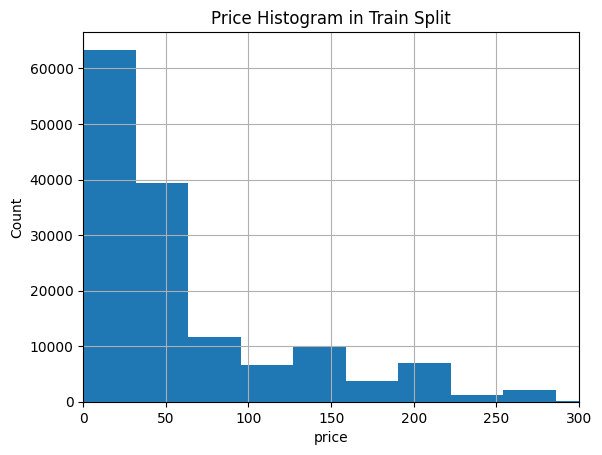

In [10]:
import matplotlib.pyplot as plt

df['price'].hist(bins=100)
plt.title('Price Histogram in Train Split')
plt.xlim(0,300)
plt.xlabel('price')
plt.ylabel('Count')
plt.show()
 

In [23]:
df=df.dropna()

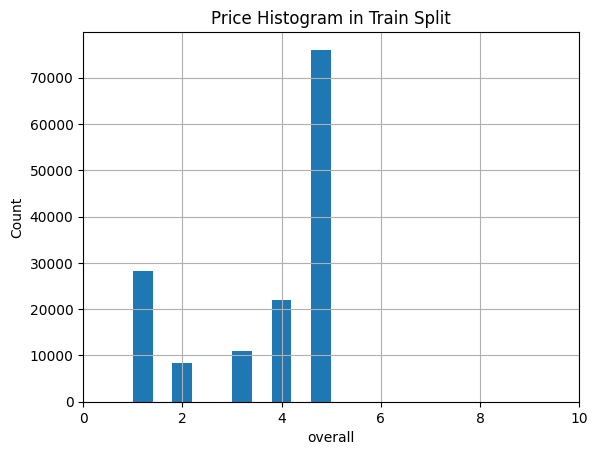

In [24]:
import matplotlib.pyplot as plt

df['overall'].hist(bins=10)
plt.title('Price Histogram in Train Split')
plt.xlim(0,10)
plt.xlabel('overall')
plt.ylabel('Count')
plt.show()

In [27]:
df.shape

(145751, 17)

In [28]:
count_ratings = [0 for i in range(len(np.unique(df['overall'])))]
print("Number of Unique Ratings available : ",len(count_ratings))
 
 

Number of Unique Ratings available :  5


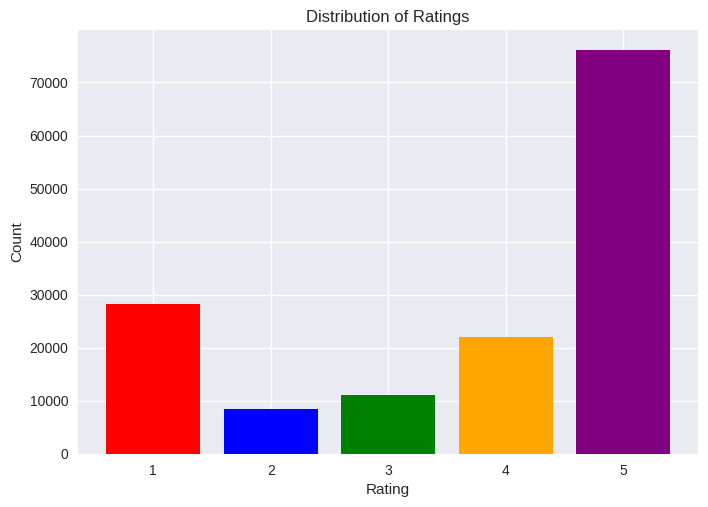

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
count_ratings = [0] * 5

for i in range(df.shape[0]):
    rating = int(df['overall'].iloc[i] - 1)
    if rating >= 0 and rating < 5:
        count_ratings[rating] += 1

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.bar(range(1, 6), count_ratings, color=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [11]:
#pip install transformers

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145751 entries, 0 to 145862
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   verified           145751 non-null  bool   
 1   overall            145751 non-null  float64
 2   reviewTime         145751 non-null  object 
 3   reviewerID         145751 non-null  object 
 4   reviewText         145751 non-null  object 
 5   category           145751 non-null  object 
 6   description        145751 non-null  object 
 7   title              145751 non-null  object 
 8   brand              145751 non-null  object 
 9   feature            145751 non-null  object 
 10  price              145751 non-null  float64
 11  software_category  145751 non-null  object 
 12  Licensing_Fee      145751 non-null  float64
 13  Implemention_cost  145751 non-null  float64
 14  Maintenance_cost   145751 non-null  float64
dtypes: bool(1), float64(5), object(9)
memory usage: 16.

In [13]:
from transformers import pipeline

# Output labels
candidate_labels = ["positive", "negative"]

# device=0 for GPU usage
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", device=0)

# Sample code to see labels for first five rows in df
for i in range(5):
  input_text = df['reviewText'].iloc[i]
  
  # multi_label=True will return confidence score for both labels independently 
  model_dict = classifier(input_text, candidate_labels, multi_label=True)

  # Zip results to dict
  result_dict = dict(zip(model_dict.get('labels'), model_dict.get('scores')))
  
  # Print confidence scores
  print("Input Text for the model : ", input_text)
  print("Confidence Score for positive Class : ", result_dict.get('positive'))
  print("Confidence Score for negative Class : ", result_dict.get('negative'), end='\n\n')

Input Text for the model :  Human Japanese is a truly superb introduction to what from the outside seems a daunting task---learning an Asian language.  Instruction in grammar and usage in this CD language program is congenial and clear.  Words, phrases, and sentences are in clickable format with instant, clear, and repeatable hearing of essential Japanese vocabulary.  Cultural notes add to the over-all excellence of the program.  With a reasonable price and rapid and courteous customer support, Human Japanese instructs and satisfies.
Confidence Score for positive Class :  0.9881229400634766
Confidence Score for negative Class :  0.044103965163230896

Input Text for the model :  I got Human Japanese as a demo from its website. Within a week I knew I had to purchase it, and it's one of the best programs I have on my entire computer.

HJ eases you into the Japanese language, beginning with the hiragana alphabet. It doesn't just show you the character, it demonstrates HOW to write it, with

In [14]:
from transformers import pipeline
import pandas as pd

# Output labels
candidate_labels = ["positive", "negative"]

# device=0 for GPU usage
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", device=0)

# Create a new column for the label in the DataFrame
df['label'] = ""

# Iterate over each row in the DataFrame
for i in range(len(df)):
    input_text = df['reviewText'].iloc[i]

    # Perform zero-shot classification
    model_dict = classifier(input_text, candidate_labels, multi_label=True)

    # Zip results to dict
    result_dict = dict(zip(model_dict['labels'], model_dict['scores']))

    # Assign the highest scoring label as the predicted label
    predicted_label = max(result_dict, key=result_dict.get)

    # Add the predicted label to the 'label' column in the DataFrame
    df.at[i, 'label'] = predicted_label

# Print the updated DataFrame
print(df)

/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:

/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:

/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:

/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/home/idisc02/anaconda3/lib/python3.10/site-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


       verified  overall   reviewTime      reviewerID  \
0         False      5.0  07 23, 2008   A8IOST6U6WH9B   
1         False      5.0   06 4, 2008  A1MUV9F35OROS5   
2         False      4.0   04 8, 2008  A27PAMABWVQ892   
3         False      5.0  03 26, 2008  A3HWWVK0L3JEKF   
4         False      5.0  02 20, 2008  A3NO2V2JU4Y8UY   
...         ...      ...          ...             ...   
137367      NaN      NaN          NaN             NaN   
140784      NaN      NaN          NaN             NaN   
144511      NaN      NaN          NaN             NaN   
144512      NaN      NaN          NaN             NaN   
144513      NaN      NaN          NaN             NaN   

                                               reviewText  \
0       Human Japanese is a truly superb introduction ...   
1       I got Human Japanese as a demo from its websit...   
2       My first experience with Human Japanese was th...   
3       This is the first language software that I hav...   
4       Hu

/tmp/ipykernel_282481/3557294439.py:31: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(df)


In [32]:
df.head(100)

,verified,overall,reviewTime,reviewerID,reviewText,category,description,title,brand,feature,price,software_category,Licensing_Fee,Implemention_cost,Maintenance_cost,label,ensemble
0,False,5.0,"07 23, 2008",A8IOST6U6WH9B,Human Japanese is a truly superb introduction ...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
1,False,5.0,"06 4, 2008",A1MUV9F35OROS5,I got Human Japanese as a demo from its websit...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
2,False,4.0,"04 8, 2008",A27PAMABWVQ892,My first experience with Human Japanese was th...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,negative,Human Japanese['<DIV>Human Japanese is softwar...
3,False,5.0,"03 26, 2008",A3HWWVK0L3JEKF,This is the first language software that I hav...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
4,False,5.0,"02 20, 2008",A3NO2V2JU4Y8UY,Human japanese is the best pc program for lear...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,5.0,"03 23, 2010",AFL7RQCOPJ0JV,I bought this because of the price and the rev...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
96,True,5.0,"11 4, 2009",A2Y1T75BOCLKY8,I've taken a Japanese class (using the Genki t...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
97,True,5.0,"10 19, 2009",A2U1OX47JSP504,I really liked this program. it was simple and...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...
98,True,4.0,"10 2, 2009",AJFB2RC9C59CA,I have not yet really mastered the Japanese la...,"['Software', 'Education & Reference', 'Languag...",['<DIV>Human Japanese is software for Windows ...,Human Japanese,Brak Software,['Over 1800 recordings of example words and se...,39.94,Education & Reference,0.008,19.97,3.994,positive,Human Japanese['<DIV>Human Japanese is softwar...


In [16]:
df_pos = df[df.label == 'positive']
df_neg = df[df.label == 'negative']


num_total = len(df)
num_pos = len(df_pos)
num_neg = len(df_neg)

print(f"Num. positive tweets: {num_pos} ({num_pos/num_total*100:.2f}%)")
print(f"Num. negative tweets: {num_neg} ({num_neg/num_total*100:.2f}%)")



Num. positive tweets: 94449 (64.75%)
Num. negative tweets: 51302 (35.17%)


In [17]:
#Creating datasoup made of selected columns
df['ensemble'] = df["title"]+df['description'] + df['software_category'].astype(str) +  df['brand']+df['reviewText'] 

#Printing record at index 0
df['ensemble'] 

0         Human Japanese['<DIV>Human Japanese is softwar...
1         Human Japanese['<DIV>Human Japanese is softwar...
2         Human Japanese['<DIV>Human Japanese is softwar...
3         Human Japanese['<DIV>Human Japanese is softwar...
4         Human Japanese['<DIV>Human Japanese is softwar...
                                ...                        
137367                                                  NaN
140784                                                  NaN
144511                                                  NaN
144512                                                  NaN
144513                                                  NaN
Name: ensemble, Length: 145863, dtype: object

In [18]:
df.to_csv('labeled_amazon.csv')